In [29]:
#importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
steps = pd.read_csv("Steps.csv",parse_dates=True)
steps.head(20)

,Date,Hour Slot,Outdoor Steps,Basic Steps
0,"Monday, July 29, 2019",12am-1am,NaN,NaN
1,"Monday, July 29, 2019",1am-2am,NaN,NaN
2,"Monday, July 29, 2019",2am-3am,NaN,NaN
3,"Monday, July 29, 2019",3am-4am,NaN,NaN
4,"Monday, July 29, 2019",4am-5am,NaN,NaN
5,"Monday, July 29, 2019",5am-6am,NaN,NaN
6,"Monday, July 29, 2019",6am-7am,NaN,NaN
7,"Monday, July 29, 2019",7am-8am,NaN,NaN
8,"Monday, July 29, 2019",8am-9am,NaN,NaN
9,"Monday, July 29, 2019",9am-10am,NaN,NaN


In [31]:
#changing 12 hours format to 24 hours
def Hours(hour):
    replace = ""
    if hour.endswith('am'):
        if hour.startswith('12'):
            replace += '00'
        elif hour.startswith('10') or hour.startswith('11'):
            replace += hour[:2]
        else:
            replace += '0'+hour[:1]
    if hour.endswith('pm'):
        if hour.startswith('12'):
            replace += hour[:2]
        else:
            replace += str(int(hour[:-2])+12)
    return(replace)
    
def changeFormat(slot):
    return Hours(slot[0])+'-'+Hours(slot[1])
    
steps['Hour Slot'] = steps['Hour Slot'].str.split('-').apply(changeFormat)  
steps.head()

,Date,Hour Slot,Outdoor Steps,Basic Steps
0,"Monday, July 29, 2019",00-01,NaN,NaN
1,"Monday, July 29, 2019",01-02,NaN,NaN
2,"Monday, July 29, 2019",02-03,NaN,NaN
3,"Monday, July 29, 2019",03-04,NaN,NaN
4,"Monday, July 29, 2019",04-05,NaN,NaN


In [32]:
#separating days and dates
steps.Date = steps.Date.str.split(', ')
steps['DayOfWeek'] = steps.Date.apply(lambda x:x[0])
steps['Dates'] = steps.Date.apply(lambda x:x[1])
steps.drop('Date', inplace = True, axis = 1)
steps = steps[['DayOfWeek', 'Dates', 'Hour Slot', 'Outdoor Steps', 'Basic Steps']]
steps.head()

,DayOfWeek,Dates,Hour Slot,Outdoor Steps,Basic Steps
0,Monday,July 29,00-01,NaN,NaN
1,Monday,July 29,01-02,NaN,NaN
2,Monday,July 29,02-03,NaN,NaN
3,Monday,July 29,03-04,NaN,NaN
4,Monday,July 29,04-05,NaN,NaN


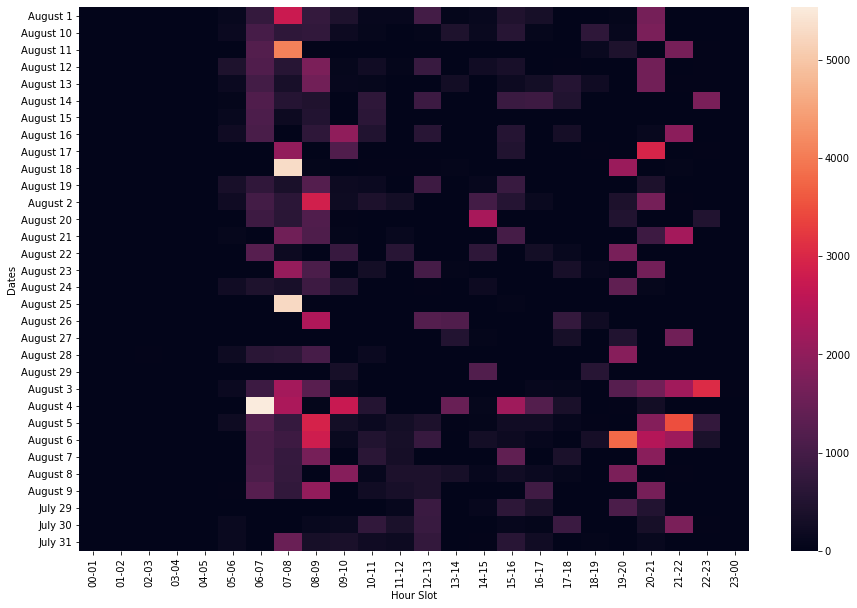

In [36]:
#heatmap
data = steps[:]
data.fillna(0, inplace = True)
data['Total_Steps'] = data['Outdoor Steps'] + data['Basic Steps']
data_new = df.pivot_table(index = 'Dates', columns = 'Hour Slot', values = 'Total_Steps', aggfunc = 'sum')
plt.figure(figsize = (15,10))
sns.heatmap(data_new)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

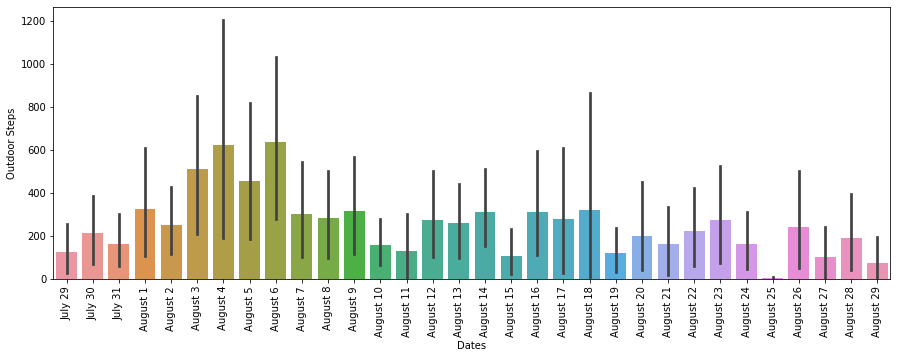

In [37]:
#bar graph
plt.figure(figsize = (15,5))
sns.barplot(x = steps['Dates'], y = steps['Outdoor Steps'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

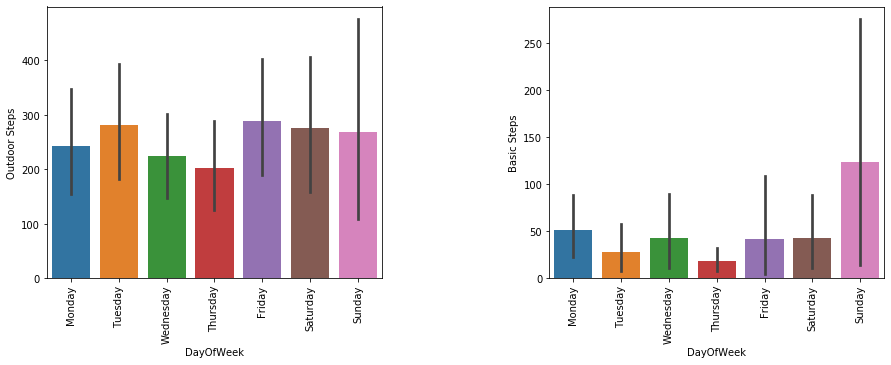

In [38]:
#bar graph according to weekdays
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
sns.barplot(x = steps['DayOfWeek'], y = steps['Outdoor Steps'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x = steps['DayOfWeek'], y = steps['Basic Steps'])
plt.xticks(rotation = 90)

Mean: Outdoor Steps    6070.59375
dtype: float64
Mean: Basic Steps    1149.25
dtype: float64


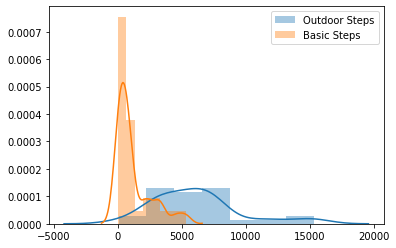

In [40]:
#central tendancy of both types of steps
data1 = steps.pivot_table(index='Dates', values='Outdoor Steps', aggfunc = 'sum')
sns.distplot(data1, label = 'Outdoor Steps')
print("Mean:",data1.mean())
data2 = steps.pivot_table(index='Dates', values='Basic Steps', aggfunc = 'sum')
sns.distplot(data2, label = 'Basic Steps')
print("Mean:",data2.mean())
plt.legend()

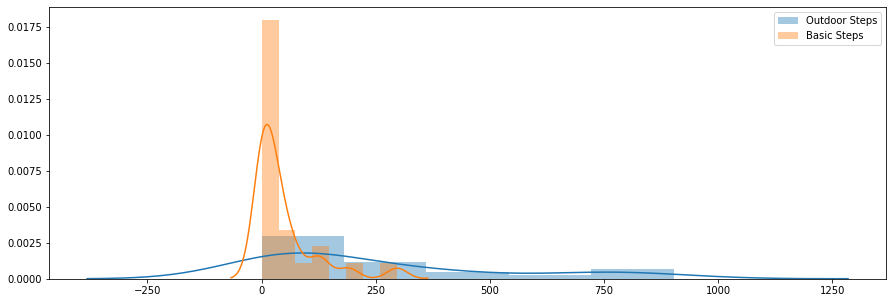

In [41]:
#variance in hourly basis
data3 = steps.pivot_table(index='Hour Slot', values='Outdoor Steps', aggfunc = 'mean')
data4 = steps.pivot_table(index='Hour Slot', values='Basic Steps', aggfunc = 'mean')
plt.figure(figsize = (15,5))
sns.distplot(data3, label = 'Outdoor Steps')
sns.distplot(data4, label = 'Basic Steps')
plt.legend()